In [ ]:
class Sentiment:
    NEGATIVE="NEGATIVE"
    NEUTRAL="NEUTRAL"
    POSITIVE="POSITIVE"

class Review:
    def __init__(self,text,score):
        self.text=text
        self.score=score
        self.sentiment=self.get_sentiment()
        
    def get_sentiment(self):
        if self.score<=3:
            return Sentiment.NEGATIVE
        else:
            return Sentiment.POSITIVE
        

In [ ]:
import json
file_name="Books_small_10000.json"
reviews=[]
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
       
        reviews.append(Review(review["reviewText"],review["overall"]))
       
        

In [ ]:
reviews[5].sentiment

'POSITIVE'

In [ ]:
text=[]
score=[]
sentiment=[]
for i in reviews:
    text.append(i.text)
    score.append(i.score)
    sentiment.append(i.sentiment)

In [ ]:
import pandas as pd
df=pd.DataFrame({"text":text,"score":score,"sentiment":sentiment})

In [ ]:
def sent_int(s):
    if s=="POSITIVE":
        return 1
    else:
        return 0
    
df["sentiment_int"]=df["sentiment"].apply(sent_int)

In [ ]:
df.head()

,text,score,sentiment,sentiment_int
0,"I bought both boxed sets, books 1-5. Really a...",5.0,POSITIVE,1
1,I enjoyed this short book. But it was way way ...,3.0,NEGATIVE,0
2,I love Nicholas Sparks. I&#8217;ve read everyt...,4.0,POSITIVE,1
3,I really enjoyed this adventure and look forwa...,4.0,POSITIVE,1
4,It was a decent read.. typical story line. Not...,3.0,NEGATIVE,0


In [ ]:
df.sentiment_int.value_counts()

1    8378
0    1622
Name: sentiment_int, dtype: int64

In [ ]:
negative=df[df.sentiment_int==0]
positive=df[df.sentiment_int==1].sample(n=len(negative))
df=pd.concat([negative,positive],axis=0).sample(frac=1)

In [ ]:
df.head(5)

,text,score,sentiment,sentiment_int
6655,I enjoyed getting to know the author and his m...,3.0,NEGATIVE,0
1635,"Concept was good, but lacking execution. Neede...",1.0,NEGATIVE,0
8988,I think Patricia has lost something. Her last...,2.0,NEGATIVE,0
6060,"I really enjoyed this book, and found it quite...",4.0,POSITIVE,1
7383,"I normally write longer reviews, but for the s...",5.0,POSITIVE,1


In [ ]:
texts=[t for t in df.text]
texts[:3]

['I enjoyed getting to know the author and his mother. It was also interesting to see the books they talked about after reading them.',
 'Concept was good, but lacking execution. Needed intense editing and better grasp with its plot. So many grammar, punctuation, and spelling errors. At some points I wondered if teens wrote this.',
 "I think Patricia has lost something.  Her last few books are such downers.  The last two I read really didn't have an ending.  She had a character in Davidson that was great but she has let him go.  I have everyone of her books, but I don't think I'll buy anymore.  There are more interesting writers coming along that I think I'll follow.  She just writes the same ole, same ole anymore."]

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

In [ ]:
texts[0]

'I enjoyed getting to know the author and his mother. It was also interesting to see the books they talked about after reading them.'

In [ ]:
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer=RegexpTokenizer(r"\w+")

# add stemming and lemmatisation in the preprocess function
def preprocess(document, stem=True):
    'changes document to lower case and removes stopwords'
    
    tb_phrase=TextBlob(document)
    document=str(tb_phrase.correct())
    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = tokenizer.tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)

    return document


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
process_text=[preprocess(t) for t in texts]

In [ ]:
process_text[:3]

['enjoy get know author mother also interest see book talk read',
 'concept good lack execut need intens edit better grasp plot mani grammar punctuat spell error point wonder ten wrote',
 'think patricia lost someth last book owner last two read realli end charact davidson great let go everyon book think buy anymor interest writer come along think follow write ole ole anymor']

In [ ]:
df["text"]=process_text

In [ ]:
from sklearn.model_selection import train_test_split
y=df["sentiment_int"]
X=df[["text"]]
X_train_,X_test_,y_train_,y_test_=train_test_split(X,y,test_size=0.2,random_state=55,stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer
train_text=[text for text in X_train_.text]
test_text=[text for text in X_test_.text]
vectorizer=TfidfVectorizer()
bow_model=vectorizer.fit_transform(train_text)
bow_model_test=vectorizer.transform(test_text)



In [ ]:
bow_model.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
bag_of_words_df=pd.DataFrame(data=bow_model.toarray(),columns=vectorizer.get_feature_names(),index=X_train_.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_of_words_df_test=pd.DataFrame(data=bow_model_test.toarray(),columns=vectorizer.get_feature_names(),index=X_test_.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_of_words_df

,00,000,03,10,100,10003,10032,10084,100ish,101,...,yuri,zanetti,zealous,zen,zero,zeynep,zip,zone,zu,zzzzzzzz
1175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train_

1175    1
1643    1
2114    1
9071    1
3421    0
       ..
4402    1
8992    1
3247    0
4729    1
3675    1
Name: sentiment_int, Length: 2595, dtype: int64

In [ ]:
bag_of_words_df["sentiment"]=y_train_.values

In [ ]:
bag_of_words_df["sentiment"]


1175    1
1643    1
2114    1
9071    1
3421    0
       ..
4402    1
8992    1
3247    0
4729    1
3675    1
Name: sentiment, Length: 2595, dtype: int64

In [ ]:
X_train=bag_of_words_df.drop("sentiment",axis=1)
y_train=bag_of_words_df["sentiment"]

In [ ]:
bag_of_words_df_test["sentiment"]=y_test_.values
X_test=bag_of_words_df_test.drop("sentiment",axis=1)
y_test=bag_of_words_df_test["sentiment"]

In [ ]:
!pip install xgboost
from numpy import loadtxt
from xgboost import XGBClassifier

In [ ]:
xgb_classifier=XGBClassifier(random_state=32)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(random_state=32)

In [ ]:
y_train

1175    1
1643    1
2114    1
9071    1
3421    0
       ..
4402    1
8992    1
3247    0
4729    1
3675    1
Name: sentiment, Length: 2595, dtype: int64

In [ ]:
y_pred=xgb_classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [ ]:
pd.DataFrame(index=X_test.index,data={"text":X_test_.text,"sentiment_int":y_test_.values,"predicted sentiment":y_pred})

,text,sentiment_int,predicted sentiment
5132,101 realli 100 long shot cri mayb 5 joke might bring slight smile face give minut penni youngman...,0,0
1903,give 2 star lack drama confront etc littl predict fanci person good stori,0,0
4796,worn christian regularli debat atheist googl thing christian hope find someth use book disappoin...,0,0
432,plot okay way mani error enjoy charact name would chang differ charact would repli much suspens ...,0,0
7259,skeptic first found look book soften blow hbo seri true detect end rememb one book list collect ...,1,0
...,...,...,...
3566,purchas book childhood nostalgia kindl price reason rememb frequent read book bookshelf th grade...,1,0
9874,read book kept wonder get much endless detail inn busi town boonesboro serious read almost like ...,0,0
6218,went expect bed dentist got look think get two fill,0,0
3747,unknown control parent penni martin travel kaylervil texa get deceas sister 8217 young daughter ...,1,1


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[250,  74],
       [113, 212]])

In [ ]:
accuracy_score(y_test,y_pred)

0.711864406779661

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       324
           1       0.74      0.65      0.69       325

    accuracy                           0.71       649
   macro avg       0.71      0.71      0.71       649
weighted avg       0.72      0.71      0.71       649



In [ ]:
df["sentiment"].value_counts()

NEGATIVE    1622
POSITIVE    1622
Name: sentiment, dtype: int64

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average=None)

array([0.72780204, 0.69394435])

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_classifier=XGBClassifier(random_state=32)
params={
 'learning_rate': [0.01,0.1,0.05],

 'max_depth': [2,3,4],


 'n_estimators': [100,200,500],
}
grid_xgb=GridSearchCV(estimator=xgb_classifier,cv=3,n_jobs=-1,param_grid=params,scoring="f1_weighted")
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
xgb_classifier=XGBClassifier(random_state=32,learning_rate=0.1,max_depth=4,n_estimators=500)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(max_depth=4, n_estimators=500, random_state=32)

In [ ]:
y_pred=xgb_classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[250,  74],
       [ 94, 231]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       324
           1       0.76      0.71      0.73       325

    accuracy                           0.74       649
   macro avg       0.74      0.74      0.74       649
weighted avg       0.74      0.74      0.74       649



In [52]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred=svc.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       324
           1       0.78      0.75      0.76       325

    accuracy                           0.77       649
   macro avg       0.77      0.77      0.77       649
weighted avg       0.77      0.77      0.77       649



In [57]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
help(svc)

In [62]:
from sklearn.model_selection import GridSearchCV
svc=SVC(random_state=42)
params={
    "kernel":["rbf","sigmoid"],
    "C":[0.2,0.5,1,2],
    "gamma":["scale","auto"]
}
grid_svc=GridSearchCV(estimator=svc,param_grid=params,cv=3,n_jobs=-1,verbose=2)
grid_svc.fit(X_train,y_train)
print(grid_svc.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [82]:
svc=SVC(random_state=42,C=1,kernel="rbf",gamma="scale",probability=True)
svc.fit(X_train,y_train)

SVC(C=1, probability=True, random_state=42)

In [83]:
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       324
           1       0.79      0.74      0.76       325

    accuracy                           0.77       649
   macro avg       0.77      0.77      0.77       649
weighted avg       0.77      0.77      0.77       649



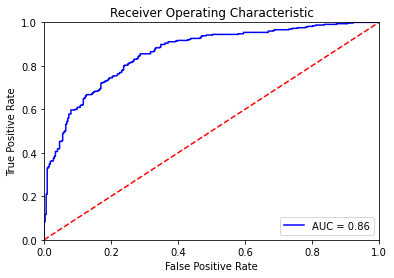

In [87]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [90]:
confusion_matrix(y_test,y_pred)

array([[258,  66],
       [ 83, 242]])

In [88]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

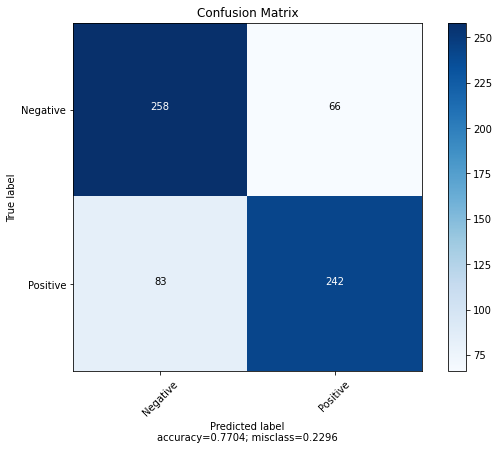

In [89]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,y_pred), 
                      normalize    = False,
                      target_names = ["Negative","Positive"],
                      title        = "Confusion Matrix")